# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers.
competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_dic = pd.read_excel("data/Data Dictionary.xlsx")

d:\miniconda_env\env\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
# Check all column information
data_dic.iloc[:,[0,1]]

,Variable,Description
0,SalesID,unique identifier of a particular sale of a ...
1,MachineID,identifier for a particular machine; machin...
2,ModelID,identifier for a unique machine model (i.e. ...
3,datasource,source of the sale record; some sources are...
4,auctioneerID,"identifier of a particular auctioneer, i.e. ..."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...
7,UsageBand,"value (low, medium, high) calculated compari..."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


# 5. EDA

In [6]:
# Import training and validation sets
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<Axes: ylabel='Frequency'>

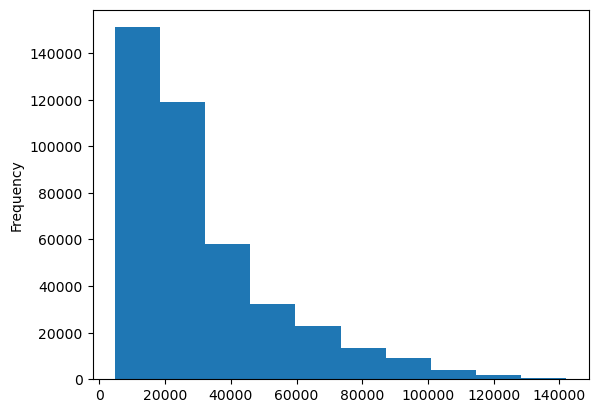

In [8]:
df.SalePrice.plot.hist()

### Parsing dates

when we work with time series data, we want to enrich the time & date component as much as possible.

we can do that by telling pandas which of our columns has dates in it using the `parse_dates`parameter.

In [11]:
# Import data again but this time parse dates
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

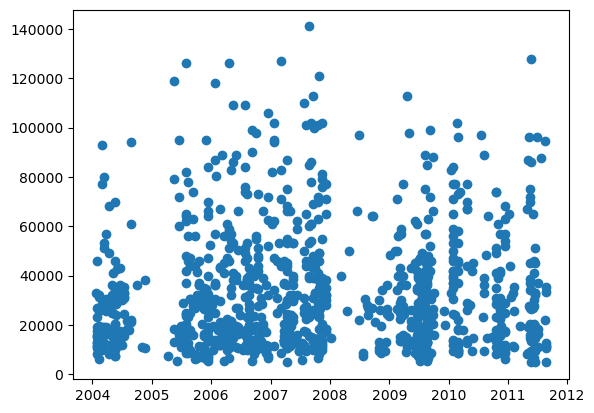

In [13]:
#correct way
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [14]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort dataframe by saledate


when working with time series data, it's a good idea to sort it by date.

In [ ]:
# sort dataframe in date order
df.sort_values(by=["saledate"],inplace =True, ascending=True)

In [16]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we have still got our original data.

In [17]:
# Make a copy

df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [18]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'
df_tmp.drop("saledate", axis=1, inplace=True)

In [21]:
#check the vaalues of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Modelling

we've done enough EDA (we could always do more) but let's start to do model-driven EDA.

In [22]:
# let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [24]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [25]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [26]:
# Find the columns which contain object datatypes


for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
# This will turn all of the object value into category values

for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [28]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

 Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.
 
 But we still hae abunch of missing data...

In [29]:
df_tmp.UsageBand.cat.codes.value_counts()

-1    339028
 2     35832
 1     25311
 0     12527
Name: count, dtype: int64

In [30]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

## Fill missing values

### Fill numeric missing values first

In [31]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary collumn which tells us if the data was missing
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [32]:
# Check if there's any null numeric values, print nothing if there is no missing value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

In [33]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [34]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate wether sample had missing values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and +1
        df_tmp[label]= pd.Categorical(content).codes + 1

In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [37]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


Now that our DataFrame has no missing values, we should be able to build a machine learning model.

In [ ]:
# %%time
# # Instantiate model
# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)

# # Fit the model
# model.fit(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

CPU times: total: 30min 12s
Wall time: 4min 20s


RandomForestRegressor(n_jobs=-1, random_state=42)

This takes 4 mins and 20 secs in my machine

In [ ]:
# # score the model

# model.score(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

0.9875468079970562

### Splitting data into train/validation sets

In [40]:
# split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]



len(df_val),len(df_train)

(11573, 401125)

In [41]:
# Split data into x and y
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
x_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [42]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Buillding an evaluation function

In [43]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    
    '''
    Calculates root mean squared log error between predictions and true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [44]:
from sklearn.metrics import r2_score

In [45]:
# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)
             }
    return scores

## Testing our model on a subset(to tune the hyperparameters)

In [44]:
# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)


# model.fit(x_train, y_train)

In [46]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [47]:
%%time
# Cutting down on the max number of samples each estimator can see improves our training time
model.fit(x_train, y_train)

CPU times: total: 56.1 s
Wall time: 7.95 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [48]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter tuning with RandomizedSearchCV

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                               random_state=42),
                             param_distributions = rf_grid,
                             n_iter=10,
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\miniconda_env\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\miniconda_env\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\miniconda_env\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\miniconda_env\env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter

CPU times: total: 2min 58s
Wall time: 49.1 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [50]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': np.int64(20),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(7),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [51]:
# Evallluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6380.542845352199,
 'Valid MAE': 7795.076182032215,
 'Training RMSLE': np.float64(0.2865504622536762),
 'Valid RMSLE': np.float64(0.31359533405037254),
 'Training R^2': 0.818599422842969,
 'Valid R^2': 0.7998303605005019}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iteration of `RandomizedSearchCV`

In [53]:
%%time

# Most ideal parameters
ideal_model = RandomForestRegressor(n_estimators=20,
                                   min_samples_leaf=12,
                                   min_samples_split=7,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the ideal model
ideal_model.fit(x_train, y_train)

CPU times: total: 2min 13s
Wall time: 21.3 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=12,
                      min_samples_split=7, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [54]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 4060.3513829760973,
 'Valid MAE': 6098.552451805656,
 'Training RMSLE': np.float64(0.193355267370183),
 'Valid RMSLE': np.float64(0.24807995393578547),
 'Training R^2': 0.9217439444664295,
 'Valid R^2': 0.8722109632752959}

In [55]:
# Scores for rs_model (trained on 10000 samples)
show_scores(rs_model)

{'Training MAE': 6380.542845352199,
 'Valid MAE': 7795.076182032215,
 'Training RMSLE': np.float64(0.28655046225367625),
 'Valid RMSLE': np.float64(0.31359533405037254),
 'Training R^2': 0.818599422842969,
 'Valid R^2': 0.7998303605005019}

## Make predictions on test data

In [56]:
#import the test data

df_test = pd.read_csv("data/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [57]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill thee numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary collumn which tells us if the data was missing
                df[label + "_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                
        #Fill categorical missing data and turn categories into number
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category codes because pandas encodes missing cateogories into 1
            df[label] = pd.Categorical(content).codes +1
    return df

In [58]:
# Process test data
df_test = preprocess_data(df_test)
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [59]:
# We can find how the columns differ using sets
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [61]:
list(x_train.columns)

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'auctioneerID_is_missing',
 'MachineHoursCurrentMeter_is_missing',

In [62]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test.insert(56,"auctioneerID_is_missing",False)

Finally now our test dataframes has the same features as our training dataframe, we can make predictions!

In [64]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [65]:
len(test_preds)

12457

We have made some predictions but they are not in the same format Kaggle is asking for:

In [66]:
# Format predictions into the same format Kaggle is after

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,19152.268951
1,1227844,15851.715637
2,1227847,47879.317210
3,1227848,67888.656600
4,1227863,51183.150183


### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In [67]:
ideal_model.feature_importances_

array([2.86308210e-02, 1.59783887e-02, 3.84884265e-02, 1.58983871e-03,
       1.68069447e-03, 2.20645018e-01, 2.13431015e-03, 7.36091131e-04,
       5.26054866e-02, 3.56310822e-02, 6.19632362e-02, 4.08885820e-03,
       1.41042877e-02, 1.67720357e-01, 4.89556892e-02, 3.00400595e-03,
       4.80892163e-03, 2.67031419e-03, 3.57872006e-03, 6.31113420e-02,
       3.69489089e-04, 4.72442606e-05, 1.70289896e-03, 1.48861605e-04,
       5.17987991e-04, 8.48334752e-06, 1.62998250e-04, 4.17770242e-03,
       2.23495226e-03, 4.56081428e-03, 7.66828662e-04, 3.36403216e-03,
       3.08498298e-03, 9.29298719e-04, 1.61651104e-04, 2.60177346e-03,
       4.73568977e-04, 2.11135698e-02, 3.45324894e-03, 6.54635651e-03,
       6.78242249e-04, 7.64486844e-04, 4.31269789e-03, 3.61871932e-04,
       2.85002667e-04, 1.43986580e-04, 6.63686938e-04, 2.79623691e-03,
       8.77039236e-04, 1.63189412e-04, 3.56406575e-04, 7.26538434e-02,
       2.49962695e-03, 2.60107064e-03, 1.26443493e-03, 6.15624863e-03,
      

In [68]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

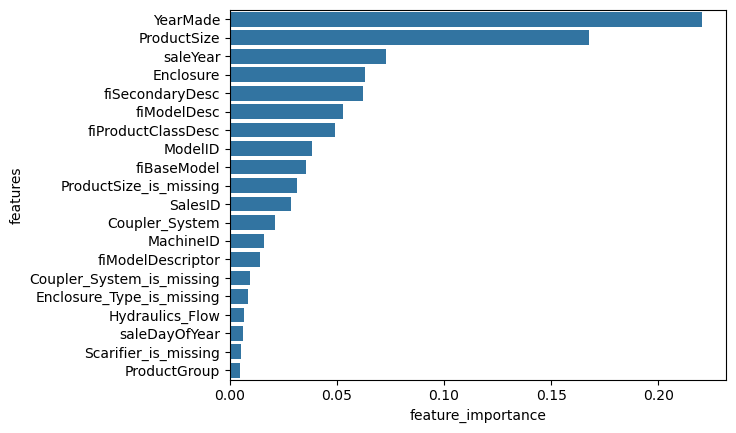

In [69]:
plot_features(x_train.columns, ideal_model.feature_importances_)